In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from utils.helper import fn_plot_tf_hist

In [ ]:

RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)
N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.1 # LEARNING RATE
TEST_SIZE = 0.2
EPOCH = 1000


In [4]:
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (12, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'savefig.dpi': 300,
          'image.cmap': plt.cm.inferno,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }

plt.rcParams.update(params)
# To control the display of floating-point numbers when printing arrays. 
np.set_printoptions(precision=3,  # number of decimal places displayed
                    suppress=True) # prevents the use of scientific notation for small numbers
CMAP = plt.cm.coolwarm
# number of columns displayed when printing a DataFrame
pd.set_option("display.max_columns", 8) # maximum number of columns that will be displayed at once
pd.set_option('display.precision', 2) # precision for floating-point numbers when it’s displayed
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
# make moons
X, y = datasets.make_moons(shuffle=True, random_state=RANDOM_STATE, n_samples=N_SAMPLE, noise=NOISE) # not having noise will make the graphs look like perfect semi circlular distribution which is not a real world example
X.shape, y.shape

((1000, 2), (1000,))

,A,B,target
0,0.91,0.90,0
1,-1.12,0.76,0
2,1.89,0.42,1
3,-0.93,-0.02,0
4,-0.97,0.06,0


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

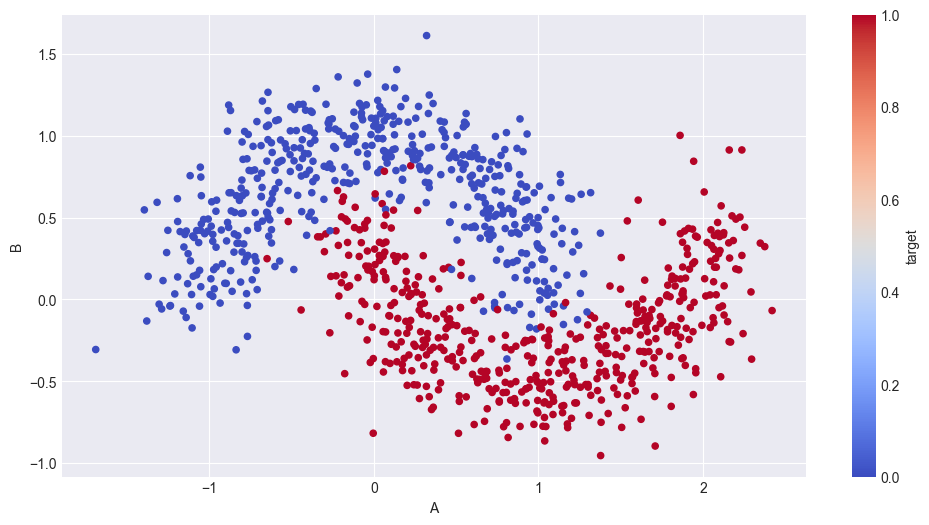

In [6]:
data_df = pd.DataFrame(X, columns=('A', 'B'))
data_df['target'] = y
display(data_df.head())
data_df.plot.scatter('A','B', c = 'target', cmap=CMAP)
display(y)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.keras.Sequential?

Init signature: tf.keras.Sequential(*args, **kwargs)
Docstring:     
`Sequential` groups a linear stack of layers into a `Model`.

Examples:

```python
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify an `Input`, the model gets built
# continuously as you are adding layers:
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))
len(model.weights)  # Returns "2"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = keras.Sequential()
model.add(keras.layers.Dense(8

In [ ]:
# Sequential model. Classic neural network. Accepts pararmeters and instances as a list of inputs
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,), name='input'), ## Input layer with 2 neurons(accepts only 2 columns)
    tf.keras.layers.Dense(5, activation='relu', name='fc_1'), # fully connected layers. Every neuron in this layer will be connected to every neuron in the next fully connected layer
    tf.keras.layers.Dense(5, activation='relu', name='fc_2'), 
    tf.keras.layers.Dense(4, activation='relu', name='fc_3'), 
    tf.keras.layers.Dense(3, activation='relu', name='fc_4'), 
    tf.keras.layers.Dense(2, name='output') # obviously we shouldn't put an activation function to the output layer

])

In [10]:
# unit testing the model on a single column/ feature of X_train
prediction = model(X_train[:1]).numpy()
prediction.sum()

np.float32(-0.96567345)

In [ ]:
tf.nn.softmax(prediction).numpy().sum()

np.float32(1.0)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                    │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
tf.keras.utils.plot_model(model, 'first_model_blud.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
# loss function definition
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # if y is not one hot encoded(in its original form), from_logits must be set to True

In [18]:
loss_fn(y_train[:1], prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6288390159606934>

In [ ]:
# compiling the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
# fit
history = model.fit(X_train, y_train, validation_data=[X_test,y_test], epochs=EPOCH) # validation data automatically trains the model on the training data and test data for every epoch

Epoch 1/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4646 - loss: 0.6926 - val_accuracy: 0.4750 - val_loss: 0.6817
Epoch 2/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4670 - loss: 0.6788 - val_accuracy: 0.5850 - val_loss: 0.6607
Epoch 3/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6174 - loss: 0.6589 - val_accuracy: 0.7000 - val_loss: 0.6326
Epoch 4/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 0.6323 - val_accuracy: 0.7300 - val_loss: 0.5943
Epoch 5/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.5981 - val_accuracy: 0.7550 - val_loss: 0.5487
Epoch 6/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7261 - loss: 0.5572 - val_accuracy: 0.7550 - val_loss: 0.5018
Epoch 7/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7456 - loss: 0.5221 - val_accuracy: 0.7700 - val_loss: 0.4615
Epoch 8/2000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7463 - loss: 0.4931 - val_accuracy: 0

In [21]:
y_train.shape

(800,)

In [25]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.47,0.69,0.47,0.68
1,0.50,0.67,0.58,0.66
2,0.67,0.65,0.70,0.63
3,0.72,0.62,0.73,0.59
4,0.74,0.58,0.75,0.55
...,...,...,...,...
1995,0.98,0.05,0.96,0.12
1996,0.98,0.05,0.96,0.12
1997,0.98,0.05,0.96,0.11
1998,0.98,0.05,0.96,0.12


,accuracy,loss,val_accuracy,val_loss
0,0.47,0.69,0.47,0.68
1,0.50,0.67,0.58,0.66
2,0.67,0.65,0.70,0.63
3,0.72,0.62,0.73,0.59
4,0.74,0.58,0.75,0.55
5,0.76,0.53,0.75,0.50
6,0.77,0.49,0.77,0.46
7,0.77,0.46,0.79,0.43
8,0.78,0.43,0.79,0.41
9,0.79,0.42,0.80,0.39


<Axes: >

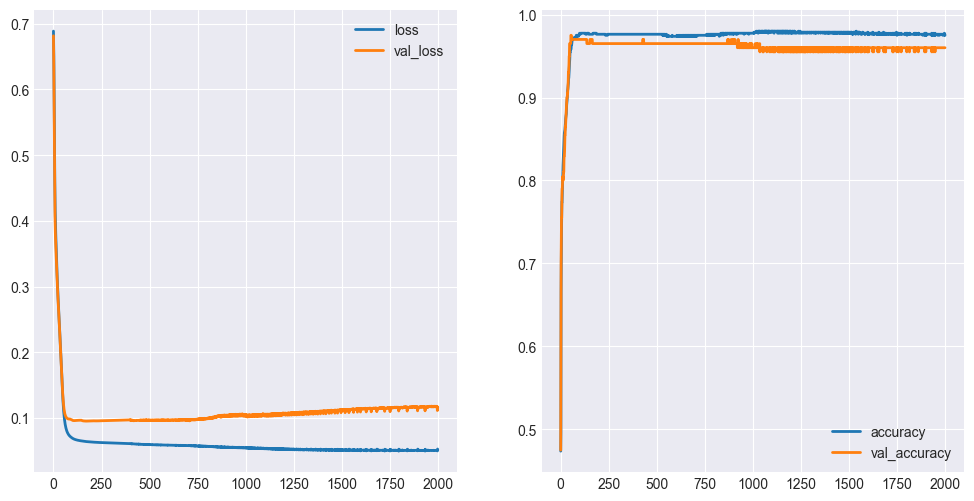

In [28]:
hist_df = pd.DataFrame(history.history)
display(hist_df.head(10))
fig, ax = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax=ax[0])
hist_df.plot(y=['accuracy','val_accuracy'], ax=ax[1])

In [26]:
# the model is being overfitted

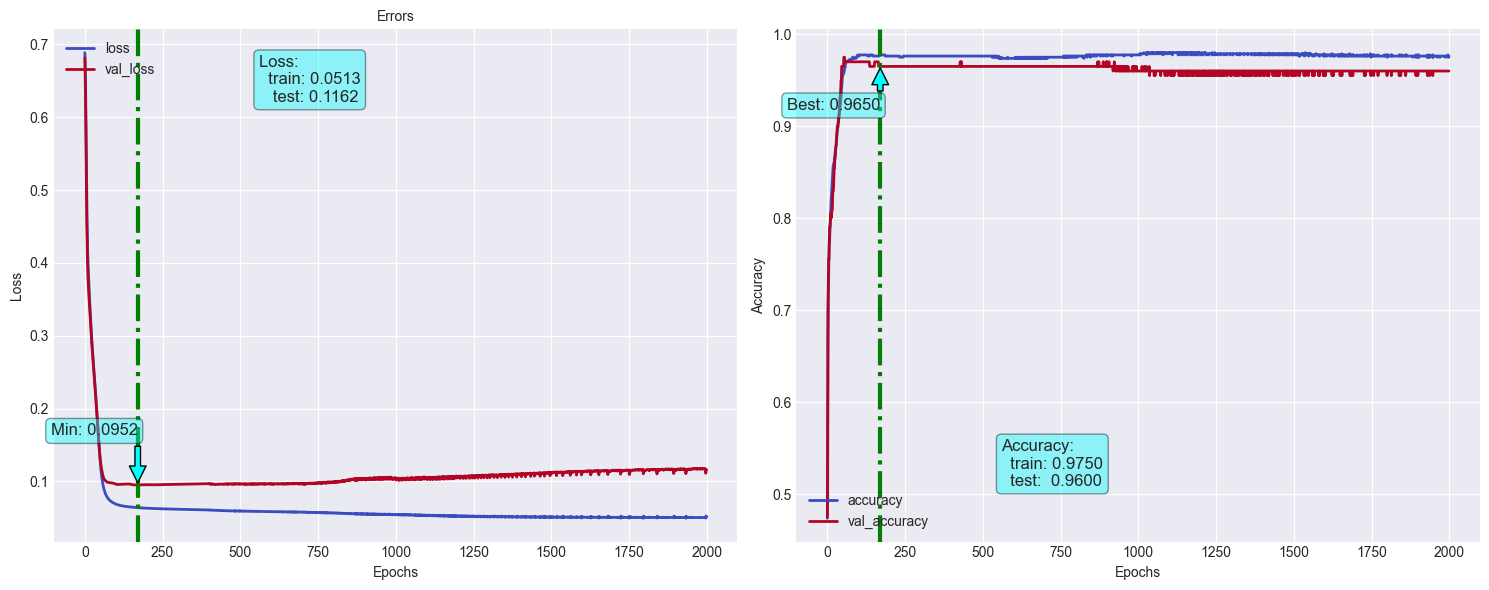

In [29]:
fn_plot_tf_hist(hist_df=hist_df)

In [36]:
# training data accuracy
y_pred = model.predict(X_train)
accuracy_score(y_true=y_train, y_pred=y_pred.argmax(axis=1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.97625

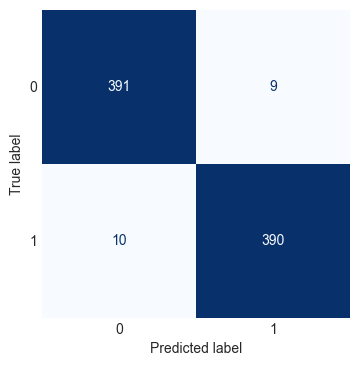

In [38]:
cm = confusion_matrix(y_true=y_train, y_pred=y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)

In [39]:
# testing data accuracy
y_pred = model.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred.argmax(axis=1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.96

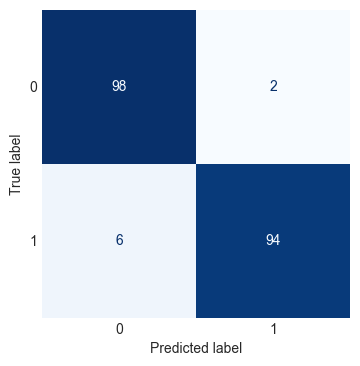

In [40]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)